In [6]:
%matplotlib inline
import torch
from d2l import torch as d2l
import numpy as np
from torch import nn


In [ ]:
# 生成数据
# format:
# 测试集，验证集 数量20
num_test, num_train = 20, 20
max_degree = 200
features = np.random.normal(size = (num_test+num_train, 1))
np.random.shuffle(features)                                      # 40*1
coefficients = 0.01 * np.ones(max_degree).reshape(1, -1)                        # 1*200
labels = np.dot(features, coefficients)

In [7]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data  = d2l.synthetic_data(true_w, true_b, n_test)
test_iter  = d2l.load_array(test_data, batch_size, is_train=False)

w的L2范数为: 0.028879575431346893


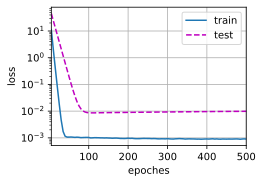

In [33]:
def init_params():
    w = torch.normal(0, 1, size = (num_inputs, 1), requires_grad = True)
    b = torch.zeros(1, requires_grad = True)
    return [w, b]

def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epoches, lr = 500, 0.003
    animator = d2l.Animator(
        xlabel="epoches", ylabel="loss", yscale="log", xlim=[5, num_epoches], legend = ['train', 'test']
    )
    for epoch in range(num_epoches):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr=lr, batch_size=batch_size)
        if (epoch+1)%5 == 0:
            animator.add(epoch+1, (
                d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)
            ))
    print('w的L2范数为:', torch.norm(w).item())

train(5)